<a href="https://colab.research.google.com/github/aryan16x/Computer-Vision/blob/main/Sec3_2DScallingTransformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
grayImg = r'/content/grayImg1.jpg'
colorImg1 = r'/content/colorImg1.jpg'
colorImg2 = r'/content/colorImg2.jpg'

In [3]:
gImg = cv2.imread(grayImg, cv2.IMREAD_GRAYSCALE)
c_BGR1 = cv2.imread(colorImg1)
c_BGR2 = cv2.imread(colorImg2)
c_RGB1 = c_BGR1[:,:,::-1]
c_RGB2 = c_BGR2[:,:,::-1]



---


**37 - Scalling Image Example in OpenCV**


---



*   So, for resize the image, we can use sv2.resize(imagePath, x-scale, y-scale, dsize)
* whereas dsize is optional (dsize - a tuple defining the final size of the image.)
* Here is the example of the grayScale image but we can also use same method for coloured images. 



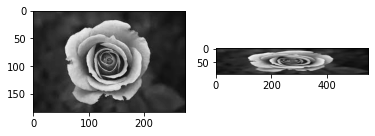

(183, 275)
(92, 550)


In [4]:
gImgResized = cv2.resize(src=gImg, fx=2, fy=0.5, dsize=None)

plt.figure(1)
plt.subplot(121)
plt.imshow(gImg, cmap='gray')
plt.subplot(122)
plt.imshow(gImgResized, cmap='gray')
plt.show()

print(gImg.shape)
print(gImgResized.shape)



---

**45 - Scalling as a Matrix multiplication Example Python**


---



In [5]:
P = np.array([2,4])

Sx,Sy = 2,3

S = np.array([[Sx,0],
              [0,Sy]])
Pdash = S.dot(P)
Pdash

array([ 4, 12])

In [6]:
P = np.array([1,2,3])

Sx,Sy,Sz = 4,5,6

S = np.array([[Sx, 0, 0],
              [0, Sy, 0],
              [0, 0, Sz]])

Pdash = S.dot(P)
Pdash

array([ 4, 10, 18])



---


**49 - Image Copy and Flipping Vertically**

---



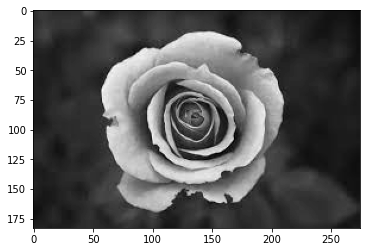

In [7]:
plt.imshow(gImg, cmap='gray')

In [8]:
numRows = gImg.shape[0]
numCols = gImg.shape[1]
print(numRows,numCols)

183 275


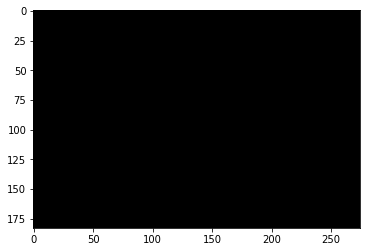

In [9]:
gImgCopy = np.zeros((numRows,numCols),dtype='uint8')

# only for info : np.ones((numRows, numCols),dtype='uint8)*255

plt.imshow(gImgCopy, cmap='gray')

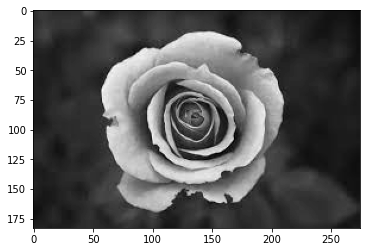

In [10]:
for i in range(numRows):
  for j in range(numCols):
    gImgCopy[i,j] = gImg[i,j]
    
plt.imshow(gImgCopy, cmap='gray')

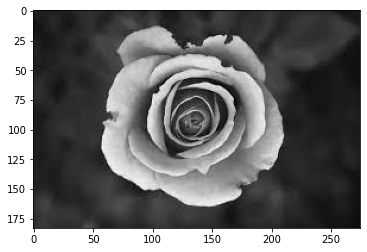

In [11]:
# To flip the Image

for i in range(numRows):
  for j in range(numCols):
    gImgCopy[numRows-i-1,j] = gImg[i,j]
    
plt.imshow(gImgCopy, cmap='gray')

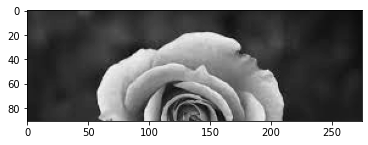

In [12]:
# To crop the image

gImgCopy2 = np.zeros((numRows//2,numCols),dtype='uint8')
for i in range(numRows//2):
  for j in range(numCols):
    gImgCopy2[i,j] = gImg[i,j]
    
plt.imshow(gImgCopy2, cmap='gray')



---

**56 - Image Doubling and Holes using Python**


---



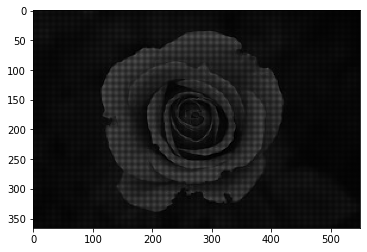

In [13]:
S = np.array([[2,0],
              [0,2]])
I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')

for i in range(numRows):
  for j in range(numCols):
    P = np.array([i,j])
    Pdash = S.dot(P)
    newi,newj = Pdash[0],Pdash[1]
    I2[newi,newj] = gImg[i,j]

plt.imshow(I2, cmap='gray')

**To display the image in original size**

In [14]:
import matplotlib as mpl

def displayImgInOriginalSize(I):
  dpi = mpl.rcParams['figure.dpi']      # dpi = dots per inch
  H,W = I.shape
  figSize = W/float(dpi), H/float(dpi)
  fig = plt.figure(figsize = figSize)
  ax = fig.add_axes([0, 0, 1, 1])
  ax.axis('off')
  ax.imshow(I, cmap='gray')
  plt.show()

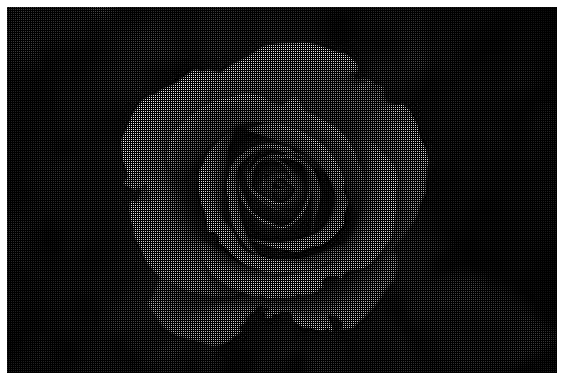

In [15]:
displayImgInOriginalSize(I2)



---

**59 - Inverse Scalling Python**


---

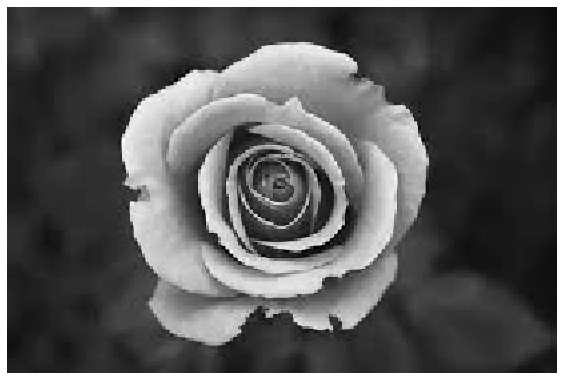

In [16]:
S = np.array([[2,0],
              [0,2]])
Sinv = np.linalg.inv(S)      # inverse of the matrix

I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')

for newi in range(I2.shape[0]):
  for newj in range(I2.shape[1]):
    Pdash = np.array([newi,newj])    
    P = Sinv.dot(Pdash)
    P = np.int16(np.round(P))
    i,j = P[0],P[1]
    if i<0 or i>=numRows or j<0 or j>=numCols:      # only to avoid error         
      pass
    else:
      I2[newi,newj] = gImg[i,j]

displayImgInOriginalSize(I2)



---

**67 - Bilinear Interpolation Implementation in Python**


---



In [22]:
def bilinearInter(row, col, I):
  lc = int(col)
  rc = lc+1
  wr = (col-lc)
  wl = (rc-col)
  tr = int(row)
  br = tr+1
  wt = (row-tr)
  wb = (br-row)
  if tr>=0 and br<I.shape[0] and lc>=0 and rc<I.shape[1]:
    a = I[tr,lc]*wl+I[tr,rc]*wr
    b = I[br,lc]*wl+I[br,rc]*wr
    intensity = a*wt+b*wb
    return int(intensity)
  return 0

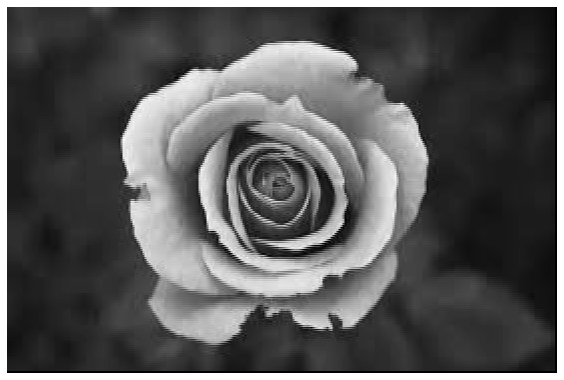

In [23]:
S = np.array([[2,0],
              [0,2]])
Sinv = np.linalg.inv(S)      # inverse of the matrix

I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')

for newi in range(I2.shape[0]):
  for newj in range(I2.shape[1]):
    Pdash = np.array([newi,newj])    
    P = Sinv.dot(Pdash)
    i,j = P[0],P[1]
    if i<0 or i>=numRows or j<0 or j>=numCols:      # only to avoid error         
      pass
    else:
      g = bilinearInter(i, j, gImg)
      I2[newi,newj] = g

displayImgInOriginalSize(I2)

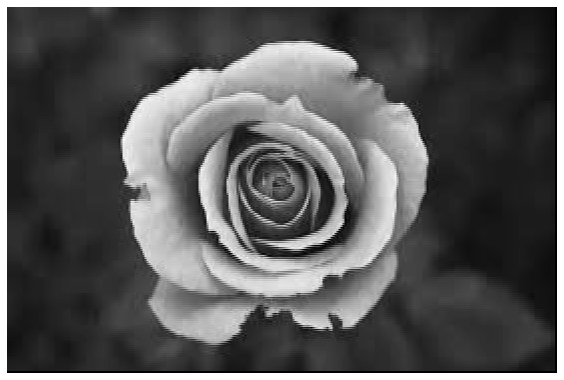

In [37]:
# scalling images in function form

def scaleImage(S, I):
  Sinv = np.linalg.inv(S)      # inverse of the matrix

  numRows,numCols = I.shape[0],I.shape[1]
  I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')

  for newi in range(I2.shape[0]): 
    for newj in range(I2.shape[1]):
      Pdash = np.array([newi,newj])    
      P = Sinv.dot(Pdash)
      i,j = P[0],P[1]
      if i<0 or i>=numRows or j<0 or j>=numCols:      # only to avoid error    
        pass
      else:
        g = bilinearInter(i, j, I)
        I2[newi,newj] = g
  return I2

Sc = np.array([[2,0],
               [0,2]])
Ix = scaleImage(Sc, gImg)
displayImgInOriginalSize(Ix)

**Scalling the colored Image**

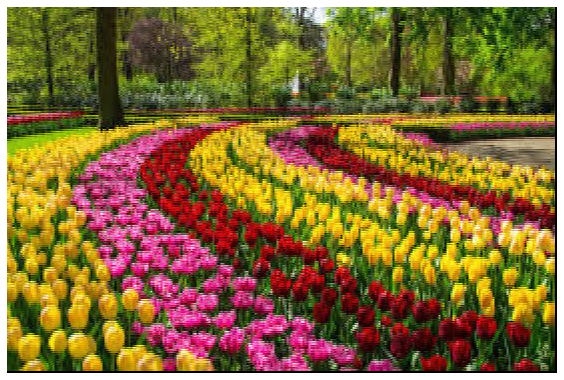

In [43]:
import matplotlib as mpl

def displayColoredImgInOriginalSize(I):
  dpi = mpl.rcParams['figure.dpi']      # dpi = dots per inch
  H,W = I.shape[0:2]
  figSize = W/float(dpi), H/float(dpi)
  fig = plt.figure(figsize = figSize)
  ax = fig.add_axes([0, 0, 1, 1])
  ax.axis('off')
  ax.imshow(I, cmap='gray')
  plt.show()

def scaleImage(S, I):
  Sinv = np.linalg.inv(S)      # inverse of the matrix

  numRows,numCols = I.shape[0],I.shape[1]
  I2 = np.zeros((2*numRows,2*numCols),dtype='uint8')

  for newi in range(I2.shape[0]): 
    for newj in range(I2.shape[1]):
      Pdash = np.array([newi,newj])    
      P = Sinv.dot(Pdash)
      i,j = P[0],P[1]
      if i<0 or i>=numRows or j<0 or j>=numCols:      # only to avoid error    
        pass
      else:
        g = bilinearInter(i, j, I)
        I2[newi,newj] = g
  return I2

Sc = np.array([[2,0],
               [0,2]])
Iclr = c_RGB2
r = scaleImage(Sc, Iclr[:, :, 0])
g = scaleImage(Sc, Iclr[:, :, 1])
b = scaleImage(Sc, Iclr[:, :, 2])

C = np.zeros((r.shape[0], r.shape[1], 3), dtype=np.uint8)
C[:,:,0] = r
C[:,:,1] = g
C[:,:,2] = b

displayColoredImgInOriginalSize(C)